In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import h5py

In [4]:
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5')

In [5]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [6]:
# Close the file
h5f.close()

In [7]:
len(X_train), len(X_test)

(42000, 18000)

**Visualizing Images**

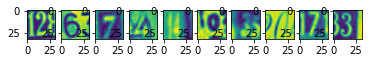

In [12]:
for i in range (10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i])
plt.show()

***Data Preparation ***: the same as ANN model

In [13]:
print('Shape :', X_train[0].shape)

Shape : (32, 32)


In [14]:
print('First image : \n', X_train[0])

First image : 
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [15]:
# Reshape and flatten the dataset
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [16]:
# Normalize inputs
X_train = X_train / 255
X_test = X_test /255

In [17]:
# New shape
print('Training set :', X_train.shape, y_train.shape)
print('Test set :', X_test.shape, y_test.shape)

Training set : (42000, 32, 32, 1) (42000,)
Test set : (18000, 32, 32, 1) (18000,)


In [19]:
# One-hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

***Model Building ***: we are going to build a CNN model

In [20]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# For this CNN model, 

1. We are going to use padding 'same' for all layers
2. LeakyReLU layer with slope equal to 0.1
3. Max-pooling layer with a pool size of 2x2
4. Flatten the output from the previous layer
5. Final output layer with nodes equal to the number of classes and softmax activation
6. Compile the model with the categorical_crossentropy loss, adam optimizers(learning_rate = 0.001), and accuracy metri

In [21]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers

In [29]:
model1 = Sequential()
model1.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', input_shape = (32,32,1)))
model1.add(LeakyReLU(0.1))
model1.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPool2D(pool_size = (2,2)))
model1.add(Flatten())
model1.add(Dense(32))
model1.add(LeakyReLU(0.1))
model1.add(Dense(10, activation = 'softmax'))


In [30]:
adam = optimizers.Adam(learning_rate = 0.001)

In [32]:
model1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [33]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                      